In this project I will analyze passenger data from the passenger liner RMS Titanic's tragic mayden voyage in April 1912. I will use the dataset located at https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download?_ga=1.248296128.651510525.1453551417 as basis for my analysis. The dataset "contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic".

**Dataset description** from Kaggle:

~~~~
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
~~~~

I will start by doing some exploratory data analysis with the following initial question in mind:
- **Which factor(s) had the greatest impact on survival rate?**

In [609]:
#Importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from IPython.display import display
from IPython.display import HTML

%matplotlib inline

In [28]:
#loading data

titanic = pd.read_csv('titanic_data.csv')



In [29]:
#Inital exploration

from IPython.display import display

print(titanic.columns)

print("number of passenger records:", len(titanic))

display(titanic.head(5))

display(titanic.iloc[5])

display(titanic.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
number of passenger records: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

In [31]:
#Making 'Sex' numeric to be able to perform mathematical operations using the variable
titanic['is_male'] = np.repeat(np.nan,len(titanic))
titanic['is_female'] = np.repeat(np.nan,len(titanic))

titanic['is_male'][titanic['Sex'] == 'male'] = True
titanic['is_male'][titanic['Sex'] == 'female'] = False
titanic['is_female'][titanic['Sex'] == 'female'] = True
titanic['is_female'][titanic['Sex'] == 'male'] = False

display(titanic['is_male'].value_counts())
display(titanic['is_female'].value_counts())
display(titanic['Sex'].value_counts())

/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


1.0    577
0.0    314
Name: is_male, dtype: int64

0.0    577
1.0    314
Name: is_female, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

In [387]:
#Getting a quick overview by aggregating the dataset
round(titanic.describe(),2)

/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_male,is_female,embarked_C,embarked_Q,embarked_S
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20,0.65,0.35,0.19,0.09,0.72
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69,0.48,0.48,0.39,0.28,0.45
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,NaN,0.00,0.00,7.91,0.00,0.00,0.00,0.00,0.00
50%,446.00,0.00,3.00,NaN,0.00,0.00,14.45,1.00,0.00,0.00,0.00,1.00
75%,668.50,1.00,3.00,NaN,1.00,0.00,31.00,1.00,1.00,0.00,0.00,1.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,1.00,1.00,1.00,1.00,1.00


From this we observe some interesting details:
* 38% of the passengers survived
* 65% of the passengers were male; 35% of the passengers were female
* The average age of the passengers is almost 30 years old [add more about percentiles]


In [30]:
#ELVEE SKIP FOR NOW
#Issues with age, will need to look closer into
print(titanic['Age'].describe())

display(titanic[titanic['Age'] == titanic['Age'].min()])

display(titanic['Age'].head(10))

display(titanic[titanic['Age'] == 32])

titanic.groupby('Age')['PassengerId'].agg('count')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S


Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
         ..
44.00     9
45.00    12
45.50     2
46.00     3
47.00     9
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: PassengerId, dtype: int64

,Survived
PassengerId,-0.01
Survived,1.00
Pclass,-0.34
Age,-0.08
SibSp,-0.04
Parch,0.08
Fare,0.26
is_male,-0.54
is_female,0.54


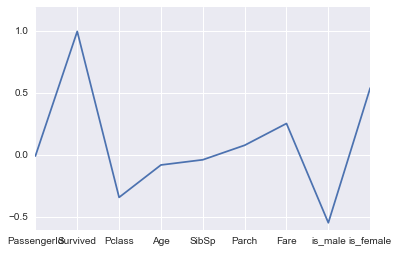

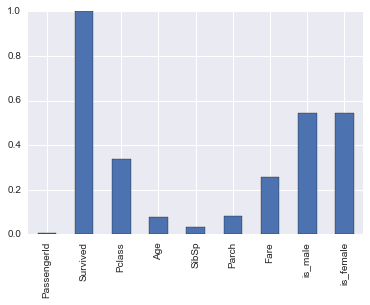

In [32]:
#Looking at survival correlation using the Pandas corr() (Pearson's correlation coefficient) function

survival_correlation = titanic.corr(method='pearson')['Survived']

display(round(survival_correlation,2).to_frame())

survival_correlation.plot()
plt.show()

#Squaring the correlation coefficients to clearer visualize the comparative correlation strengths
np.sqrt(survival_correlation ** 2).plot(kind='bar')

This indicates that sex (being female) and passenger class where the most important factors for survival on the Titanic, with high and medium correlation scores. Ticket price also has a fairly large correlation score (Pearson's correlation coefficient). I suspect this is due to better ticket classes costing more, which I will look into next.

In [33]:
display(round(titanic.corr(method='pearson')['Fare'],2).to_frame())

display(round(titanic.groupby('Pclass')['Fare'].describe(),2).to_frame())


,Fare
PassengerId,0.01
Survived,0.26
Pclass,-0.55
Age,0.10
SibSp,0.16
Parch,0.22
Fare,1.00
is_male,-0.18
is_female,0.18


Fare
Pclass              
1      count  216.00
       mean    84.15
       std     78.38
       min      0.00
       25%     30.92
       50%     60.29
       75%     93.50
       max    512.33
2      count  184.00
       mean    20.66
       std     13.42
       min      0.00
       25%     13.00
       50%     14.25
       75%     26.00
       max     73.50
3      count  491.00
       mean    13.68
       std     11.78
       min      0.00
       25%      7.75
       50%      8.05
       75%     15.50
       max     69.55

In [ ]:
zero_fare[zero_fare['Pclass'] == 1]

In [607]:
#Looking further at the passengers who did not pay for their tickets (ticket price 0)

zero_fare = (titanic[titanic['Fare'] == 0].sort_values('Pclass'))

display(zero_fare)

print("1st class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 1]['Pclass'].count())
print("2nd class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 2]['Pclass'].count())
print("3rd class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 3]['Pclass'].count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female,embarked_C,embarked_Q,embarked_S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1.0,0.0,0.0,0.0,1.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1.0,0.0,0.0,0.0,1.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1.0,0.0,0.0,0.0,1.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,1.0,0.0,0.0,0.0,1.0


1st class passenger with 0 ticket price: 5
2nd class passenger with 0 ticket price: 6
3rd class passenger with 0 ticket price: 4


In [35]:
#Checking for corelation again, excluding passenger who did not pay for their tickets.

display(round((titanic[titanic['Fare'] > 0].corr(method='pearson')['Fare']),2).to_frame())

,Fare
PassengerId,0.02
Survived,0.25
Pclass,-0.56
Age,0.10
SibSp,0.16
Parch,0.21
Fare,1.00
is_male,-0.18
is_female,0.18


Since the correlation between ticket class and ticket price is very high, I will consider ticket class alone as sufficent for analyzing the impact of social class on survival rate.

Survived  Passengers  percent_survived
Embarked Sex                                           
C        female        64          73             87.67
         male          29          95             30.53
Q        female        27          36             75.00
         male           3          41              7.32
S        female       140         203             68.97
         male          77         441             17.46

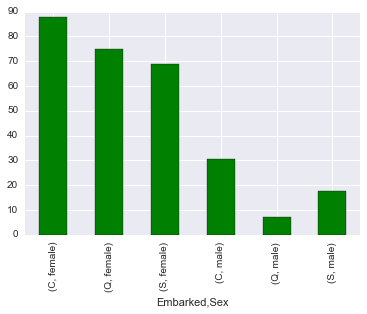

In [346]:
gb_survival_embarked_sex = titanic.groupby(
    ['Embarked','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_embarked_sex['percent_survived'] = round(
    (gb_survival_embarked_sex['Survived'] / gb_survival_embarked_sex['Passengers']) * 100,2
)



display(gb_survival_embarked_sex)

ax = gb_survival_embarked_sex.sort_index(level='Sex')['percent_survived'].plot(kind='bar',color='g')



In [355]:
#Percentage point difference between the survival percentage of Cherbourg and the other port cities
display(gb_survival_embarked_sex.loc['C']['percent_survived'] 
- gb_survival_embarked_sex.loc[['Q','S']]['percent_survived'])

Embarked  Sex   
Q         female    12.67
          male      23.21
S         female    18.70
          male      13.07
Name: percent_survived, dtype: float64

Survived,0,1,All,percent_survived
Embarked,,,,
C,75,93,168,55.36
Q,47,30,77,38.96
S,427,217,644,33.70
All,549,340,889,38.25


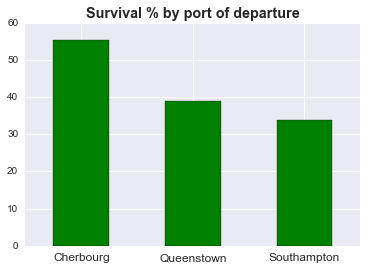

In [359]:
#[CHECK]

survival_by_embarked = pd.crosstab(titanic['Embarked'],titanic['Survived'],margins=True)
survival_by_embarked['percent_survived'] = round((survival_by_embarked[1] / survival_by_embarked['All'])*100,2)

display(survival_by_embarked)

ax = survival_by_embarked.loc[['C','Q','S']]['percent_survived'].plot(kind='bar',color='g')

#ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'],rotation=0)

ax.set_title('Survival % by port of departure',fontsize='x-large',fontweight='bold')
ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'],rotation='horizontal',fontsize='large')
ax.set_xlabel('')

We see here that passengers embarking from Cherbourg had a drastically higher survival rates than passengers embarking from Queenstown or Southampton. Before I consider other factors I want to find out if this difference is statistically significant.

In [309]:
#One-way Anova test for statistical significance
from scipy import stats

embarked_cherbourg = titanic[titanic['Embarked'] == 'C']
embarked_queenstown = titanic[titanic['Embarked'] == 'Q']
embarked_southampton = titanic[titanic['Embarked'] == 'S']

cherbourg_count = len(embarked_cherbourg)
quenstown_count = len(embarked_queenstown)
southampthon_count = len(embarked_southampton)

embarked_anova = stats.f_oneway(
    embarked_cherbourg['Survived'],embarked_queenstown['Survived'],embarked_southampton['Survived'])

embarked_anova

F_onewayResult(statistic=13.605270445693582, pvalue=1.514339014290716e-06)

According to the f statistic and p value returned from the anova test, the different survival rates between the ports of departure are very statistically significant. Next I will take a closer look at Sex as a potential impacting factor for the higher survival rate for passengers embarking from Cherbourg. Maybe the female ratio, which we know is a statistically significant factor for survival, is higher?

In [239]:
sex_by_embarked = pd.crosstab(titanic['Embarked'],titanic['Sex'],margins=True)
sex_by_embarked['percent_female'] = round((sex_by_embarked['female'] / sex_by_embarked['All']) * 100,2)
sex_by_embarked['percent_male'] = round((sex_by_embarked['male'] / sex_by_embarked['All']) * 100,2)

sex_by_embarked

Sex,female,male,All,percent_female,percent_male
Embarked,,,,,
C,73,95,168,43.45,56.55
Q,36,41,77,46.75,53.25
S,203,441,644,31.52,68.48
All,312,577,889,35.10,64.90


In [348]:
#T-test to for statistical significance of difference between ratio of Cherbourg and Southampton female passengers

stats.ttest_ind(
    embarked_cherbourg[embarked_cherbourg['Sex'] == 'female']['Survived'],
    embarked_queenstown[embarked_queenstown['Sex'] == 'female']['Survived'])



Ttest_indResult(statistic=1.6820293094291934, pvalue=0.095479459992920124)

Passengers embarking from Cherbourg have a 12% higher rate of women than passenger embarking from Southampton. The difference between the female rate of Cherbourg and Queenstown passengers, however, is only 3.3%. This is not a statistically significant difference (p-value 0.1).

Let's take a look to see if the males and females of the different embarked groups have similar survival rates.

#[Check]

Of the passengers embarking from Cherbourg, both males and females had a greater survival rate compared to males and females embarking from the other ports. Compared to Southampton, the departure city with the lowest overall survival percentage, the difference between male survival percentage of Cherbourg passengers is higher than the female survival percentage. Since females have an overall larger survival rate, this indicates that sex is not a major factor of the larger Cherbourg survival rate.

To take a further look at the contributing factors for the correlation between 'Embarked' and 'Sex' I will convert 'Embarked' to boolean integers.

In [364]:
#Making boolean dummy columns for 'Embarked' values
titanic = pd.concat([titanic,pd.get_dummies(titanic['Embarked'],prefix='embarked')], axis=1)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0,0.0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0,0.0,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1.0,0.0,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0.0,1.0,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0.0,1.0,1.0,0.0,0.0


In [385]:
southampton_corr = titanic.corr(method='pearson')['embarked_S'].to_frame()
queenstown_corr = titanic.corr(method='pearson')['embarked_Q'].to_frame()
cherbourg_corr = titanic.corr(method='pearson')['embarked_C'].to_frame()


display('Southampton:',southampton_corr)
display('Queenstown:',queenstown_corr)
display('Cherbourg:',cherbourg_corr)

'Southampton:'

,embarked_S
PassengerId,0.022148
Survived,-0.155660
Pclass,0.081720
Age,-0.032523
SibSp,0.070941
Parch,0.063036
Fare,-0.166603
is_male,0.125722
is_female,-0.125722
embarked_C,-0.778359


'Queenstown:'

,embarked_Q
PassengerId,-0.033606
Survived,0.003650
Pclass,0.221009
Age,-0.022405
SibSp,-0.026354
Parch,-0.081228
Fare,-0.117216
is_male,-0.074115
is_female,0.074115
embarked_C,-0.148258


'Cherbourg:'

,embarked_C
PassengerId,-0.001205
Survived,0.168240
Pclass,-0.243292
Age,0.036261
SibSp,-0.059528
Parch,-0.011069
Fare,0.269335
is_male,-0.082853
is_female,0.082853
embarked_C,1.000000


This shows a pretty strong correlation between embarking in Cherbourg and Passenger class.

In [420]:
embarked_by_class['percent_1st_class'][['C','Q','S']].sort_values(ascending)

Embarked
Q     2.60
S    19.72
C    50.60
Name: percent_1st_class, dtype: float64

Pclass,1,2,3,All,percent_1st_class
Embarked,,,,,
C,85.00,17.0,66.00,168.0,50.60
Q,2.00,3.0,72.00,77.0,2.60
S,127.00,164.0,353.00,644.0,19.72
All,214.00,184.0,491.00,889.0,24.07
percent_in_class,24.07,20.7,55.23,100.0,2.71


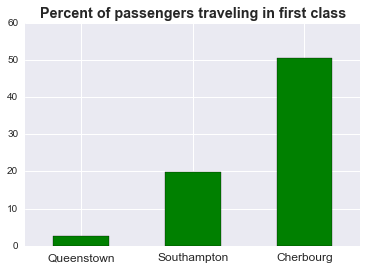

In [425]:
embarked_by_class = pd.crosstab(titanic['Embarked'],titanic['Pclass'],margins=True)

embarked_by_class['percent_1st_class'] = round((embarked_by_class[1] / embarked_by_class['All'])*100,2)
embarked_by_class.loc['percent_in_class'] = round(
    (embarked_by_class.loc['All'] / embarked_by_class['All']['All'])*100,2)

display(embarked_by_class)

#ax = embarked_by_class.sort_index(level='Sex')['percent_survived'].plot(kind='bar',color='g')
ax = embarked_by_class['percent_1st_class'][['Q','S','C']].plot(
    kind='bar',color='g')

ax.set_title('Percent of passengers traveling in first class',fontsize='x-large',fontweight='bold')
ax.set_xticklabels(['Queenstown','Southampton','Cherbourg'],rotation='horizontal',fontsize='large')
ax.set_xlabel('')

Based on this it seems like the reason for the higher survival rate of passengers departing from Cherbourg is largely due to the much larger percentage of passengers travelling in first class, compared to the passengers who embarked in Southampton and Queenstown. Next I will take a final look at the survival rate per passenger class for the different ports of departure.

In [469]:
['KANSKJE FJERNE']
#Survival percentage per passenger class for the different ports of departure
def survival_percentage(df,para):
    unique_vals = pd.Series(df[para].unique())
    unique_vals = (unique_vals).dropna().sort_values()
        
    for val in unique_vals:
        var_survivors = df[df[para] == val]['Survived']
        var_survivors_sum = var_survivors.sum()
        var_survivors_percentage = round(var_survivors_sum / var_survivors.count()*100,2)
        
        print(val, "survival percentage:",var_survivors_percentage,"(count: {})".format(
                var_survivors_sum))
    
    return 1

print("1st class passengers:")
survival_percentage(titanic[titanic['Pclass'] == 1],'Embarked')
print("2nd class passengers:")
survival_percentage(titanic[titanic['Pclass'] == 2],'Embarked')
print("3rd class passengers:")
survival_percentage(titanic[titanic['Pclass'] == 3],'Embarked')


1st class passengers:
C survival percentage: 69.41 (count: 59)
Q survival percentage: 50.0 (count: 1)
S survival percentage: 58.27 (count: 74)
2nd class passengers:
C survival percentage: 52.94 (count: 9)
Q survival percentage: 66.67 (count: 2)
S survival percentage: 46.34 (count: 76)
3rd class passengers:
C survival percentage: 37.88 (count: 25)
Q survival percentage: 37.5 (count: 27)
S survival percentage: 18.98 (count: 67)


1

In [463]:
test_o = pd.Series(titanic['Embarked'].unique())

type(test_o)

pandas.core.series.Series

In [400]:
#[REMOVE PROBABLY]

pd.crosstab(titanic['Sex'],titanic['Pclass'],margins=True)



Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [220]:
#[CHECK]
survival_by_sex = pd.crosstab(titanic['Sex'],titanic['Survived'],margins=True)

survival_by_sex['percent_survived'] = round((survival_by_sex[1] / survival_by_sex['All'])*100,2)

display(survival_by_sex)

Survived,0,1,All,percent_survived
Sex,,,,
female,81,233,314,74.20
male,468,109,577,18.89
All,549,342,891,38.38


In [41]:
#counting survivors by ticket class and sex
gb_survival_class_sex = titanic.groupby(['Pclass','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_class_sex['percent_survived'] = round(
    (gb_survival_class_sex['Survived'] / gb_survival_class_sex['Passengers']) * 100,2
)

#counting survivors by sex
gb_survival_by_sex = titanic.groupby(['Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_by_sex['percent_survived'] = round(
    (gb_survival_by_sex['Survived'].div(gb_survival_by_sex['Passengers'],level='Sex')) * 100,2)

display(gb_survival_class_sex)
display(gb_survival_by_sex)

#gb_survival_class_sex['Survived'].div(gb_survival_sex['Passengers'],level='Sex')


Survived  Passengers  percent_survived
Pclass Sex                                           
1      female        91          94             96.81
       male          45         122             36.89
2      female        70          76             92.11
       male          17         108             15.74
3      female        72         144             50.00
       male          47         347             13.54

,Survived,Passengers,percent_survived
Sex,,,
female,233,314,74.20
male,109,577,18.89


We see here why the correlation between survival and sex is so high: 74.2% of females survived, but only 18.9% of males survived.

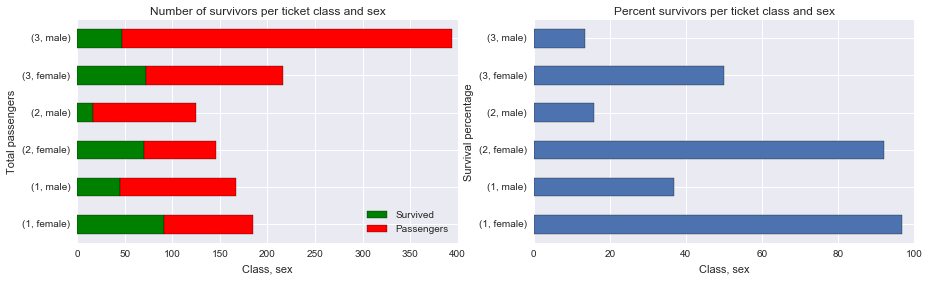

In [55]:
# col_labels = gb_survival_class_sex.index.levels[1]
# row_labels = gb_survival_class_sex.index.levels[0]
# table_vals = list()

# for row in row_labels:
#     for col in col_labels:
#         table_vals.append(gb_survival_class_sex.loc[row,col]['percent_survived'])

#plt.subplot(1,2,1)        
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,4))

plt.title("Number of survivors per ticket class and sex")

gbplot1 = gb_survival_class_sex[['Survived','Passengers']].plot(
    kind='barh',ax=axes[0],stacked=True,color=['g','r']
)

#gbplot.set_xticklabels(['females 1st class','males 1st class', 'females 2nd class',
#                       'males 2nd class','females 3rd class', 'males 3rd class'])

gbplot1.set_xlabel("Class, sex")
gbplot1.set_ylabel("Total passengers")
gbplot1.set_title("Number of survivors per ticket class and sex")

#plt.subplot(2,1,2)


#collabel=("col 1", "col 2","col 3")
#the_table = gbplot.table(cellText=gb_survival_class_sex[['percent_survived']].to_records(),colLabels=collabel,loc='center')
#----------
# plt.subplot(2,1,2)
# fig, axs =plt.subplots(2,1)
# clust_data = np.random.random((10,3))
# collabel=("col 1", "col 2", "col 3")
# axs[0].axis('tight')
# axs[0].axis('off')
# the_table = axs[0].table(cellText=clust_data,colLabels=collabel,loc='center')

# axs[1].plot(clust_data[:,0],clust_data[:,1])

#----------

gbplot2 = gb_survival_class_sex['percent_survived'].plot(kind='barh',ax=axes[1])

gbplot2.set_xlabel("Class, sex")
gbplot2.set_ylabel("Survival percentage")
gbplot2.set_title("Percent survivors per ticket class and sex")

#plt.show()

#plt.subplot(1,2,2)

#plt.close()

#gb_survival_class_sex.reset_index(level=1)


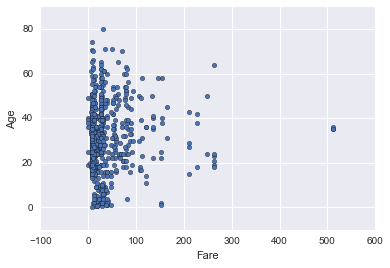

In [117]:
#[CHANGE]

titanic[['Fare','Age']].plot(x='Fare',y='Age',kind='scatter')

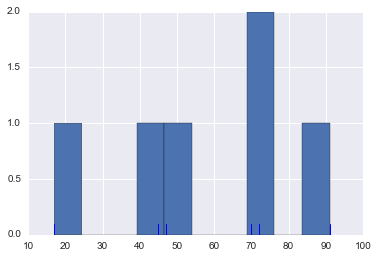

In [53]:
plt.hist(gb_survival_class_sex['Survived'], alpha=1)
sns.rugplot(gb_survival_class_sex['Survived']);

The plots above highlights how much class determined likelihood of survival on the Titanic. We see that while the large majority of females in 2nd and 1st class survived, only half of the females in 3rd class survived. It's interesting to observe that this group of passengers still had a higher survival rate than any of the male groups, where the highest survival rate were the first class passengers. Only a little over a third of the male first class passengers survived.

__To do next:__

1. <s>Finish the plot of survival and gender. See http://stackoverflow.com/questions/8524401/how-can-i-place-a-table-on-a-plot-in-matplotlib</s>
2. <s>Clean up: go through and see what's worth keeping, and remove the rest.</s> 
    2a. Sort out data issues. Age at least.
3. <s>Upload HTML and get feedback from Elvee.</s>
4. <s>Look at correlation between survival and embarked. Finish with dummy and corr(). Write about class.</s> 
5. Do cleanup.
6. <s>Explain why not looking at the other non-number variables (ticket number etc.)</s>
7. <s>Look at age cutoff, to see if children survived, and see what age was considered children.</s>
8. Perform statistical tests for significance of findings
9. Do cleanup.
10. See whether everything in https://review.udacity.com/#!/rubrics/107/view is covered
11. Write a conclusion, which does not imply correlation equals causation

In [575]:
age_groups = titanic[titanic['Age'].isnull() == False][['Age','Survived','Sex']]

bins = [0,5,10,15,20,30,40,50,60,70,80,90]
group_names = ['0 to 5','6 to 10','11 to 15','16 to 20','21 to 30','31 to 40','41 to 50','51 to 60',
              '61 to 70','71 to 80','81 to 90']
categories = pd.Series(pd.cut(age_groups['Age'], bins ,labels=group_names))

age_groups['categories'] = categories

age_groups.head(5)

,Age,Survived,Sex,categories
0,22.0,0,male,21 to 30
1,38.0,1,female,31 to 40
2,26.0,1,female,21 to 30
3,35.0,1,female,31 to 40
4,35.0,0,male,31 to 40


In [570]:
pd.crosstab(age_groups['categories'],age_groups['Sex'])

Sex,female,male
categories,,
0 to 10,31,33
11 to 20,46,69
21 to 30,81,149
31 to 40,55,100
41 to 50,31,55
51 to 60,14,28
61 to 70,3,14
71 to 80,0,5
81 to 90,0,0


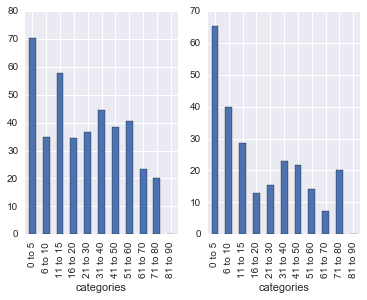

In [596]:
age_count = age_groups.groupby('categories')['categories'].agg('count')
age_male_count = age_groups[age_groups['Sex'] == 'male'].groupby('categories')['categories'].agg('count')

#Grouping by age of survivors
survivor_ages = age_groups[age_groups['Survived'] == True]

#Grouping by age and sex of survivors                                            
survivor_ages_males = age_groups[(age_groups['Survived'] == True) & (age_groups['Sex'] == 'male')]

survived_age_count = survivor_ages.groupby('categories')['categories'].agg('count')
survived_age_male_count = survivor_ages_males.groupby('categories')['categories'].agg('count')

survivor_age_groups = (survived_age_count / age_count * 100)
survivor_age_male_groups = (survived_age_male_count / age_male_count * 100)

plt.subplot(1,2,1)
survivor_age_groups.plot(kind='bar')

plt.subplot(1,2,2)
survivor_age_male_groups.plot(kind='bar')

In [ ]:
Looking at the charts above, it seems like 

In [497]:
titanic[titanic['Survived'] == 1]['Age'].describe()

titanic[(titanic['Age'].isnull() == True) & (titanic['Survived'] == 1)]


/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,is_female,embarked_C,embarked_Q,embarked_S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1.0,0.0,0.0,0.0,1.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0.0,1.0,1.0,0.0,0.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0.0,1.0,0.0,1.0,0.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0.0,1.0,1.0,0.0,0.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0.0,1.0,0.0,1.0,0.0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1.0,0.0,1.0,0.0,0.0
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,0.0,1.0,0.0,1.0,0.0
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1.0,0.0,0.0,0.0,1.0
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,1.0,0.0,1.0,0.0,0.0
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,0.0,1.0,0.0,1.0,0.0


In [203]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print pd.value_counts(data["LoanAmount_Bin"], sort=False)

0.41999999999999998

AttributeError: Unknown property table

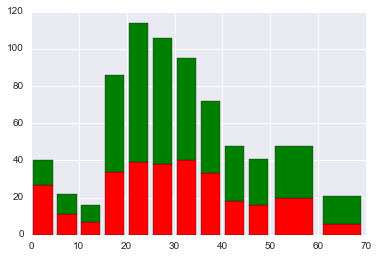

In [210]:
age_min = titanic['Age'].min()
age_max = titanic['Age'].max()


plt.hist([titanic[titanic['Survived'] == True]['Age'],titanic[titanic['Survived'] == False]['Age']],
          bins=[0,5,10,15,20,25,30,35,40,45,50,60,70], range=(age_min,age_max), stacked=True, color = ['r','g'],table=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1208dca20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1251a5320>], dtype=object)

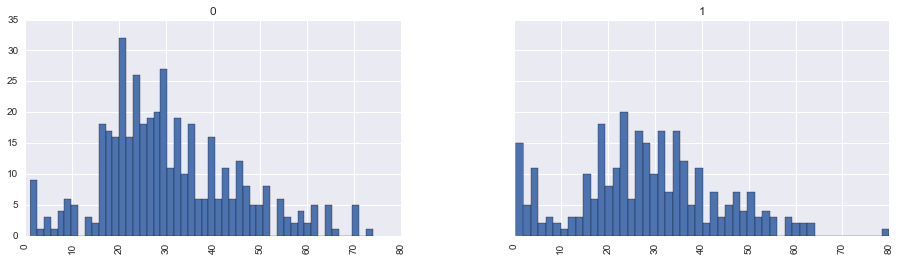

In [191]:
#fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,4))

titanic['Age'].hist(by=titanic['Survived'],bins=50,figsize=[15,4],sharey=True,stacked=True)

In [169]:
pd.crosstab(titanic['Age'],titanic['Survived'],margins=True)

ct_survival_by_age = pd.crosstab(titanic['Age'],titanic['Survived'],margins=True)

pd.crosstab(titanic['Age'],titanic['Survived'],margins=True)

ct_survival_by_age['percent_survived'] = round((ct_survival_by_age[1] / 
                                               ct_survival_by_age['All'])*100,2)

ct_survival_by_age#[1].plot(kind='line')

Survived,0,1,All,percent_survived
Age,,,,
0.42,0,1,1,100.00
0.67,0,1,1,100.00
0.75,0,2,2,100.00
0.83,0,2,2,100.00
0.92,0,1,1,100.00
1.0,2,5,7,71.43
2.0,7,3,10,30.00
3.0,1,5,6,83.33
4.0,3,7,10,70.00


Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

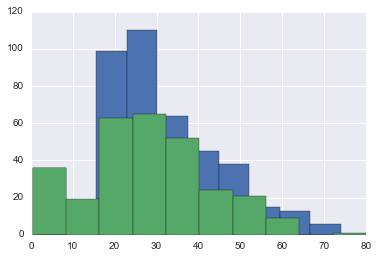

In [128]:
titanic.groupby('Survived')['Age'].hist()

_Sources_


__Python documentation, book:__  
McKinney, Wes, 2012. _Python for Data Analysis_. O'Reilly Media

__Python documentation, websites:__  
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/  
http://pandas.pydata.org/pandas-docs/stable/

__Dataset details:__
https://www.kaggle.com/c/titanic/data


Statistical methods and terminology are largely based on teachings from the Descriptive Statistics and Inferential Statistics Udacity courses.

__Other statistics resources:__  
